# Assignment 2: Clustering and Categorization

------------------------

## Academic misconduct

This assignment is intended to be completed individually. Do not discuss solutions to any questions with your fellow students, and acknowledge any resources you used. Please make  sure you are familiar with the [school's academic misconduct policy](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct).


## Answering questions

The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code

In every place where you need to write code you will see:

    YOUR CODE HERE
    raise NotImplementedError()

or

    YOUR CODE HERE

Delete the raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

In general, you should write your solutions so the notebook can be run from start-to-finish, from scratch. To check this, you can open the "Kernel" menu above and select "restart and run all". This will restart the kernel and run all cells from first to last.

### Text

For questions that require you to write text the cell will say YOUR ANSWER HERE. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, but please try to give answers in the requested cells wherever possible.

------------------------


## Introduction

In this task you will induce semantic categories for a set of words by clustering them into sets of semantically related words. You will cluster the words on the basis of their
representations in a space of semantic features, applying **agglomerative hierarchical clustering**. We
will use the [**linkage**](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) function from scikit-learn to do the clustering:

$$\mathbf{Z} = \mathbf{linkage}(\mathbf{X},\mathbf{method},\mathbf{metric})$$

The function performs agglomerative hierarchical clustering of the rows of matrix **X**
and returns tree **Z** encoding a dendrogram of the resulting hierarchical clusters. 
The argument **method** describes the clustering criterion, i.e., how to measure the distance
between clusters. 

In the lectures, we discussed three different clustering criteria:

- **single-linkage**, (called 'single' in scikit-learn)
- **complete-linkage**, ('complete')
- **group average**, ('average')
The argument **metric** specifies the function that will be used to compute distances between the rows of **X**. We will use cosine distance (via the argument 'cosine')[(*1)](#References).

### A simple example

Let's first go through an example to show what you'll need to know for task 1. 

In [1]:
# import numpy, the python scientific package
import numpy as np

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# A seed for the random number generator so all results are reproducible
np.random.seed(15)

In [2]:
'''
Assume we are given matrix contains features for four letters. 
Each letter's features are a row in the matrix A. 

In this case, the features are made up and don't have any particular
interpretation.
'''

A = np.matrix([[1,2,3],[1,2,5],[7,1,-5],[3,4,6]])
print(A)

[[ 1  2  3]
 [ 1  2  5]
 [ 7  1 -5]
 [ 3  4  6]]


In [3]:
# The letters are defined in:
letters = ['a','o','k','e']
print(letters)

['a', 'o', 'k', 'e']


We'll now do hierarchical clustering on the data using the single-linkage criterion.


In [4]:
# First, import the linkage function from scipy library
from scipy.cluster.hierarchy import linkage

'''
Now, we use the linkage function on the feature matrix A,
with our chosen criterion and distance function: 
'''

TreeA = linkage(A,'single','cosine')

Now we have two options to further inspect the clustering. 

### Visualising dendograms

The first option is to view the corresponding dendrogram. Try it out and make sure you understand how to read it.

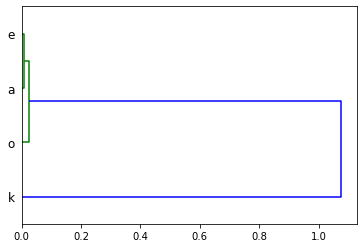

In [5]:
# import the dendrogram function from scipy
from scipy.cluster.hierarchy import dendrogram

dendrogram(TreeA, labels=letters, orientation= 'right');

### Working with clusters
The second option is to obtain the clusters at a certain height in the tree. This is done with the function **fcluster**, where we have to specify the maximum number **t** of the resulting clusters.

The function returns a column vector **clustering** of size 4, where row i contains the cluster assignment of row (item) i of matrix A. 

Try it out with an increasing number of maximum clusters, starting with t=1. 

In [6]:
# import the flat cluster function from scipy
from scipy.cluster.hierarchy import fcluster

In [7]:
clustering = fcluster(TreeA,t=3, criterion= 'maxclust')

In [8]:
for letter, cluster in zip(letters, clustering):
    print (letter,':', cluster)

a : 1
o : 1
k : 2
e : 1


Make sure you understand how fcluster works.

## Loading the data

For our task, you will use the data relating to Task 1. Let's load the files we'll need to the notebook.

In [9]:
# First, we import the pandas library [pandas.pydata.org], a useful package for data analysis.
import pandas as pd 

# edit the pandas display options
pd.set_option('display.max_columns', 12)

In [10]:
# then we import the different files relating to Task 1
words1 = pd.read_csv("./words1.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()

matrix1_mcrae = pd.read_csv("./matrix1_mcrae.csv", index_col=0).values
matrix1_bnc = pd.read_csv("./matrix1_bnc.csv", index_col=0).values

### About the data
You've just loaded the words we want to cluster, in **words1**. These are the the 44 most frequently-occurring content words in the British National Corpus [(BNC)[1]](#References). You can see what each word is (e.g., banana, boat) by printing the **words1** matrix. 

You have also loaded two matrices of features: **matrix1_mcrae** and **matrix1_bnc**

Each of the two matrices represents a different set of features for the words in **words1**.

**matrix1 bnc** is a 44×2497 matrix where each row contains features for the corresponding word in **words1**. The features are the number of times a target word co-occurs with a context word in the BNC, using a context window of ± 5 words. 

**matrix1_mcrae** is a 44 × 2526 matrix where each row contains features for the corresponding word in **words1**. The  features are based on judgments by humans in a "norming" study conducted by [McRae et al. [2]](#References). 

The list of features can be seen in **feats_mcrae**. To do this, you can print **feats_mcrae** in the cell below. Notice that there are many features, so they won't print all at once. Remember that you can print specific entries in a matrix using notation like `feats_mcrae[200:240]` -- that will product the 200th through the 240th features in the McRae corpus.

Each matrix cell in **matrix1_mcrae** corresponds to the number of humans that listed a feature for a given target word. (You have already worked with McRae et al.’s data in assignment 1).

Inspecting the data (e.g. using the print() command) and make sure you understand what each file contains.

## Question 1 (10%): Dendrograms with BNC.

**Cluster the target words on the basis of the vector representations obtained from the BNC.**

Do this by using all three clustering criteria (single-linkage: ```'single'```, complete-linkage: ```'complete'```, and average-linkage: ```'average'```). 
Show the dendrogram output for each criterion and use the ```words1``` vector to display the labels.

Make sure all the plots are readable (you can change the figure size for this), have a title, and that the font of the labels is readable too (you can use ```leaf_font_size=``` in the dendogram function). You can use multiple cells to plot each tree.

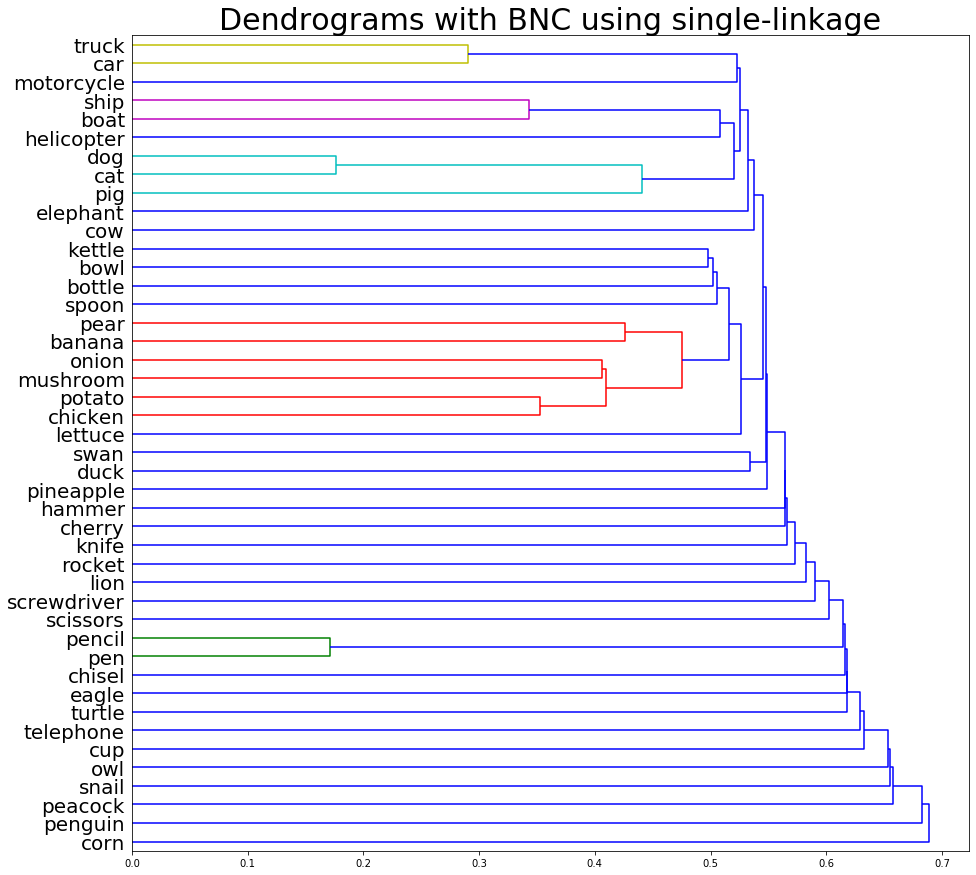

In [11]:
# YOUR CODE HERE
TreeSingleBNC = linkage(matrix1_bnc,'single','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using single-linkage",fontsize=30)
dendrogram(TreeSingleBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()
# YOUR CODE HERE

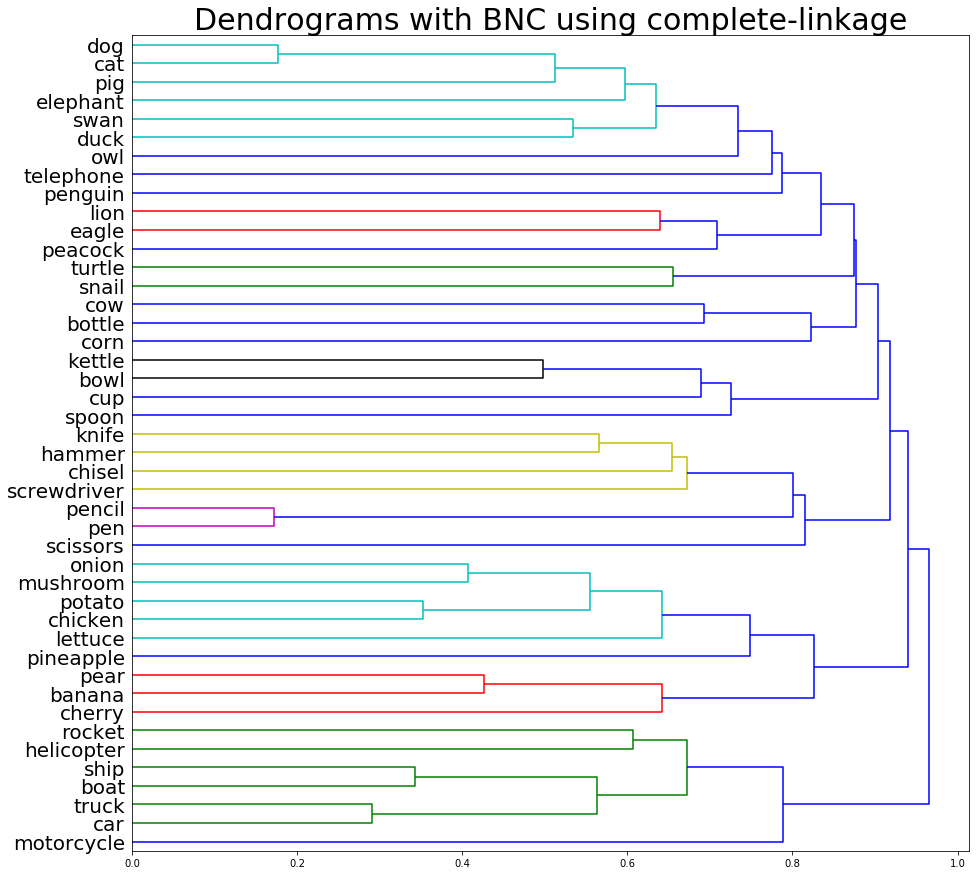

In [12]:
# YOUR CODE HERE
TreeCompleteBNC = linkage(matrix1_bnc,'complete','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using complete-linkage",fontsize=30)
dendrogram(TreeCompleteBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()
# YOUR CODE HERE

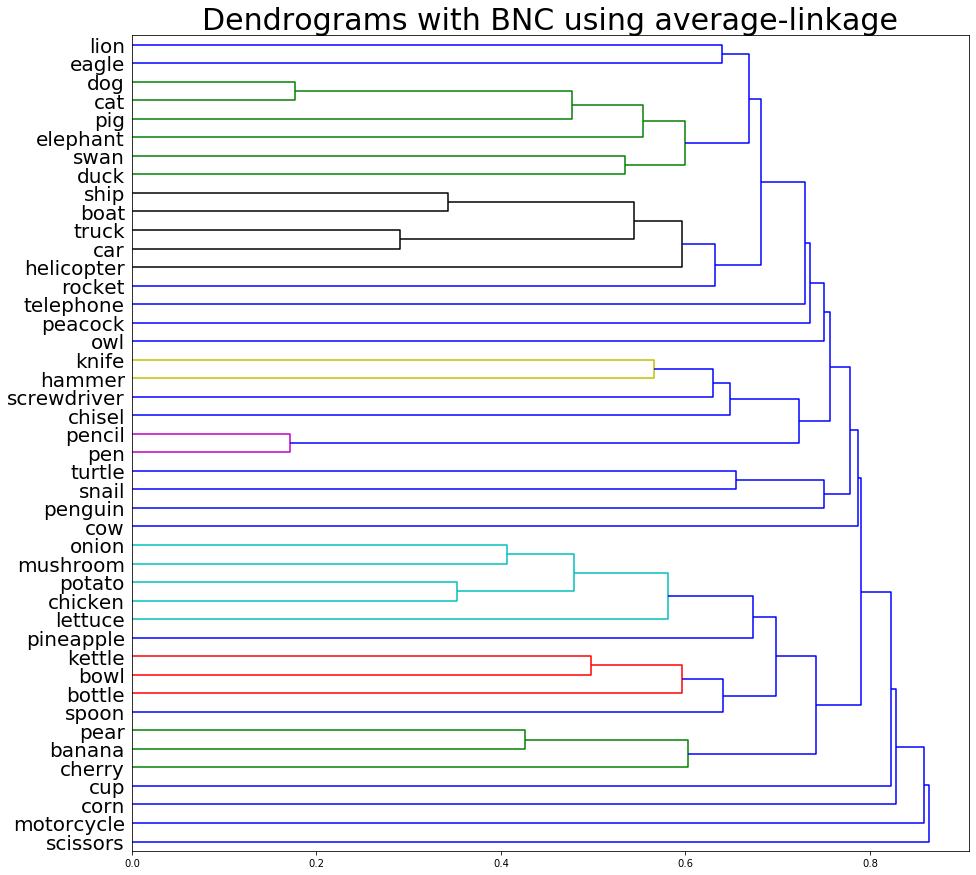

In [13]:
# YOUR CODE HERE
TreeAverageBNC = linkage(matrix1_bnc,'average','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using average-linkage",fontsize=30)
dendrogram(TreeAverageBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()
# YOUR CODE HERE

## Question 2: Making sense of dengrograms (10%)

Here, you will compare the different link functions by inspecting the dendrograms.

In the warm-up example, the cluster with which *o* is merged is $\{e,a\}$, and this new cluster $\{e,a,o\}$ is afterwards merged with k. So, the words involved are  e,a,o,k. 

**a) What words are first merged with *corn* using a complete link function?**

From the second graph, we can see that the cluster with which corn is merged is {cow,bottle}. 

**b) How and why do the simple and complete link functions treat *corn* differently, in terms of what it is first merged with? What do the results tell us about the similarities words in the data set?**

For single linkage, corn is the last one to have been merged. It is merged with all other words which have already been merged previously. And for complete linkage, corn is merged with {cow,bottle} in the first merge. The reason for this difference can be that the way of computation differs. 1. For single linkage, it chooses the distance between two closest points respectively in the two different clusters. It is a direct and intuitive way of getting the greatest similarity between clusters and doing the merge. So the reason for corn being the last one to have been merged may be that corn doesn't have a close neighbor. That is to say, the difference of features between corn and other things is bigger than the difference of any other pair of words. 2. For complete linkage, it focuses on the minimization of the degree of difference. As it computes the farthest distances of all pairs of points in two different clusters, and then chooses the distance with the shortest length from them. The words corn and bottle may not have too much a big difference between them; meanwhile other longest distances between clusters are longer than this one. So these two words are merged together in the complete linkage. The result tells us that, generally speaking, the similarities words may be very different when using different ways of linkage. For the case of corn, we can deduce from the result that corn is not close to any other word in the vector space - it has the farthest neighbor, but it also doesn't have a great degree of difference in the cluster depending on the farthest distance in the vector space.

## Question 3 (10%): Dendrograms with McRae.

**a) Cluster the target words again, but this time on the basis of the vector representations obtained from McRae et al.'s data.**


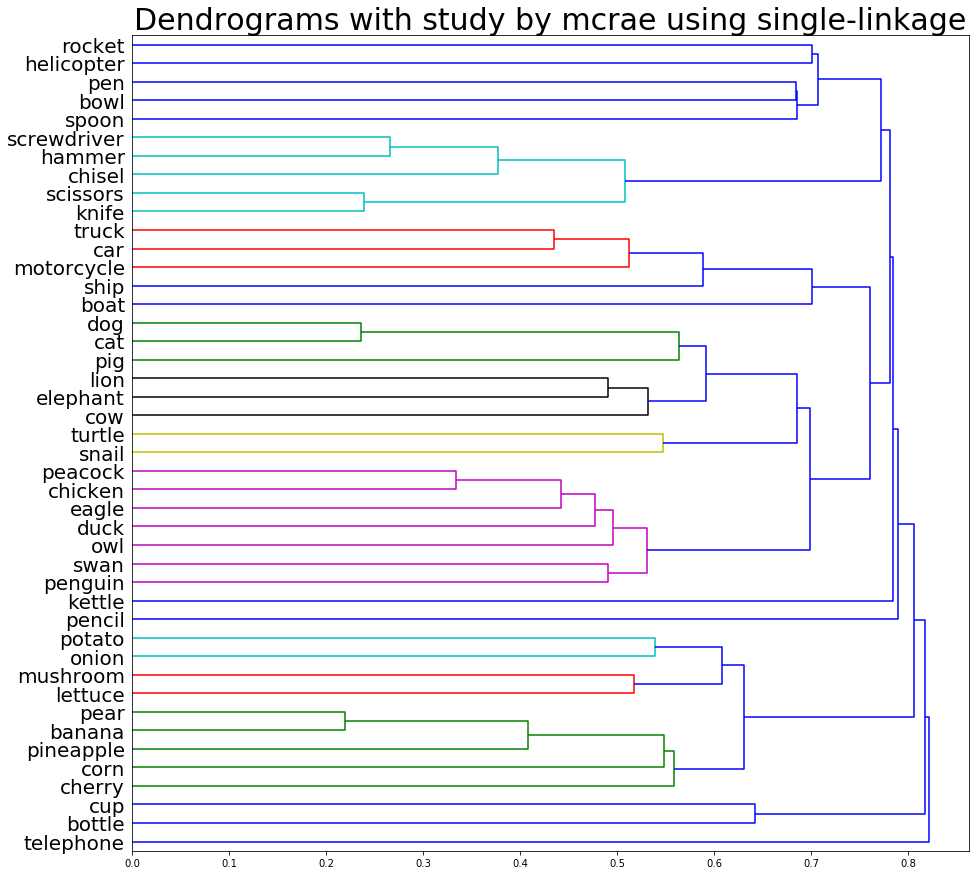

In [14]:
TreeSingleMR = linkage(matrix1_mcrae,'single','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using single-linkage",fontsize=30)
dendrogram(TreeSingleMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()
# YOUR CODE HERE

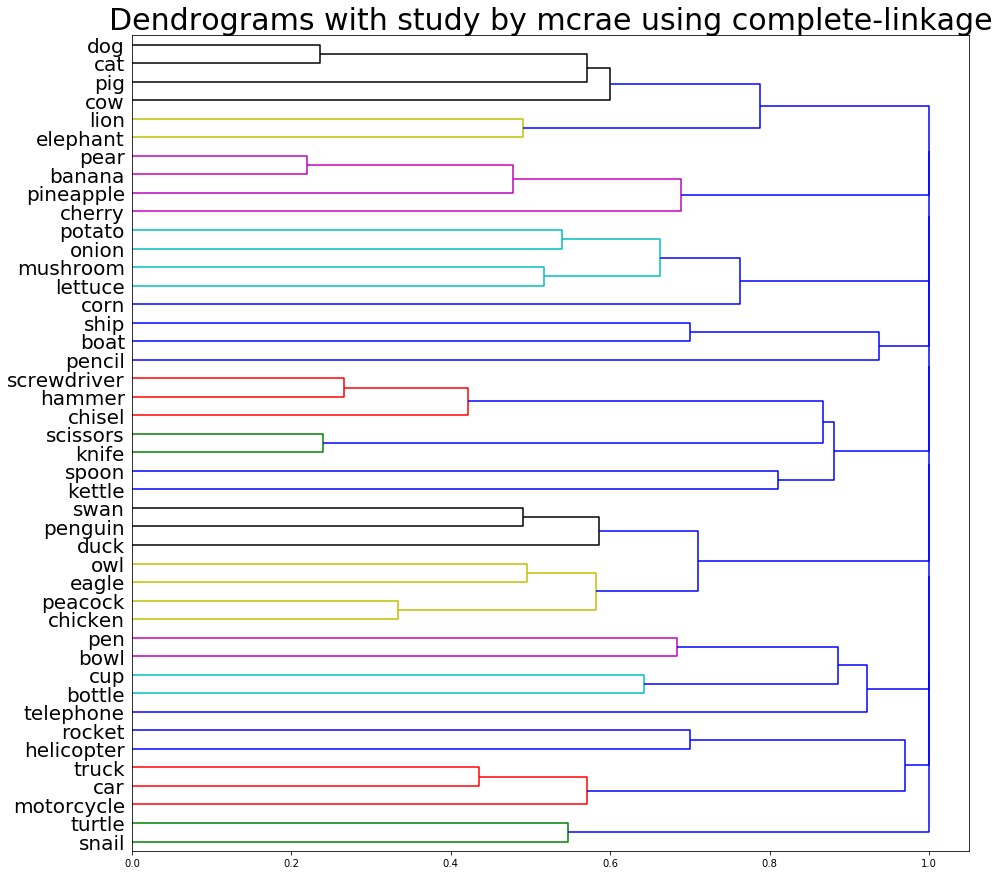

In [15]:
TreeCompleteMR = linkage(matrix1_mcrae,'complete','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using complete-linkage",fontsize=30)
dendrogram(TreeCompleteMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()
# YOUR CODE HERE

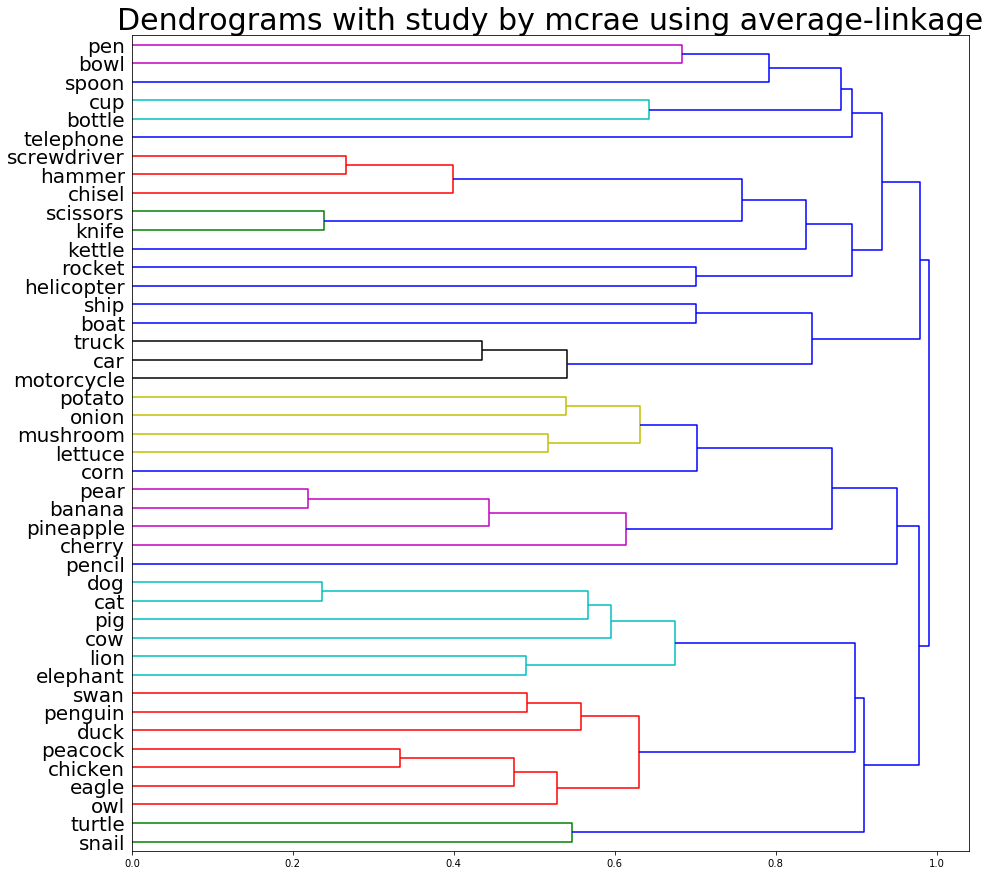

In [16]:
TreeAverageMR = linkage(matrix1_mcrae,'average','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using average-linkage",fontsize=30)
dendrogram(TreeAverageMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()
# YOUR CODE HERE

**b) For McRae, how do the results for *corn* differ between the simple and complete link functions? How might you explain this difference in terms of possible similarities between words in McRae? Overall, are these results more or less consistent than the results based on the BNC data?**

For single linkage, corn is merged with {pear, banana, pineapple}, where pear and banana are merged earlier, then pineapple is merged to  {pear, banana}. And for complete linkage, corn is merged with {potato, onion, mushuroom, lettuce} in the first merge, where {potato, onion} and {mushuroom, lettuce} are merged separately earlier, then these two are merged together. The difference results from the features used and ways of computation. First, the features are set mannually by the study. This leads to possible similarities in vector spaces in things in the same category. Secondly, for single link function, corn is considered more similar to fruit in features if we take a brief look, possibly because that corn is very similar to a certain kind of fruit in the previously formed group. And for complete link functions, if there exists some long distance, which means the degree of difference is too big for some certain pair, the group won't be formed for this pair. So corn is merged with other vegetables, so that the maximum difference will be reduced. It doesn't appear like single linkage to be merged with fruit because there may be long distances between corn and some words in the category of fruit. 

And yes, the results are more consistent than the ones based on BNC. Because the category seemed more logical and practical, and the two results from single and complete linkage doesn't seem to be conflicting, as the categories all belong to food semantically.

## Question 4 (10%): BNC vs McRae

Now compare the two different semantic space representations.

**a) For each vector space, what is the implied semantic category of *chicken*? Justify your answer.**


Let's talk about the first vector space first. In the category using matrix_bnc, chicken is merged with words like potato, mashroom, onion... Trained by context words from BNC, the implied semantic category of chicken is something we eat everyday. It is considered as food, and it is put into the categorization of food together with other food. For justification(the code used is listed below), we get the value of cosine between chicken and other words. For cosine between chicken and peacock, the result is 0.26786604148153603. For cosine between chicken and potato, the result is 0.6475171259000461. As closer to 1 the value of cos is, more similar between the two words will become. We can see that the similarity of vectors for food is far bigger than that for animal, because of bigger cosine.

Secondly, for the second vector space, in the category using matrix1_mcrae, chicken is merged with living things like peacock and eagle. For justification, we observe its features by printing all non-zero features(as the features by mcrae are sparse), we get : a_bird is 14 , 
an_animal is 11 , 
beh_-_cannot_fly is 9 , 
beh_-_eats is 7 , 
beh_-_flies is 5 , 
beh_-_lays_eggs is 25 , 
eaten_by_frying is 5 , 
has_a_beak is 8 , 
has_feathers is 21 , 
has_legs is 5 , 
has_wings is 9 , 
is_domestic is 6 , 
is_edible is 12 , 
is_loud is 5 , 
is_stupid is 5 , 
lives_on_farms is 11 , which suggests that the study conducted by McRae argues the word chicken refers to the animal. Similarly, if we use the same way to check the cosine value between chicken and peacock or potato. We get that " For cosine between chicken and peacock:
result is 0.4919751850259508. For cosine between chicken and potato:
result is 0.048523373381591295" .We can see that the similarity of vectors for animal(peacock) is far bigger than that for food(potato), because of bigger cosine.

In [17]:
def cosVector(x,y):
    if(len(x)!=len(y)):
        print('error input,x and y is not in the same space')
        return;
    result1=0.0;
    result2=0.0;
    result3=0.0;
    for i in range(len(x)):
        result1+=x[i]*y[i]   #sum(X*Y)
        result2+=x[i]**2     #sum(X*X)
        result3+=y[i]**2     #sum(Y*Y)
    print("result is "+str(result1/((result2*result3)**0.5))) #show the results

print("1. For cosine between chicken and peacock:")
cosVector(matrix1_bnc[7],matrix1_bnc[26])                  #7 is chicken, 26 is peacock
print("2. For cosine between chicken and potato:")
cosVector(matrix1_bnc[7],matrix1_bnc[33])                  #33 is potato

1. For cosine between chicken and peacock:
result is 0.2320178214444637
2. For cosine between chicken and potato:
result is 0.6475171259000461


In [18]:
# check the nonzero featues of matrix1_mcrae
i=0
while (i<2526):
    if(matrix1_mcrae[7][i]!=0):
        print(feats_mcrae[i],"is",matrix1_mcrae[7][i],", ")
    i=i+1
    
print("----------------------------------------------------------------------------------")
print("1. For cosine between chicken and peacock:")
cosVector(matrix1_mcrae[7],matrix1_mcrae[26])                  #7 is chicken, 26 is peacock
print("2. For cosine between chicken and potato:")
cosVector(matrix1_mcrae[7],matrix1_mcrae[33])                  #33 is potato

a_bird is 14 , 
an_animal is 11 , 
beh_-_cannot_fly is 9 , 
beh_-_eats is 7 , 
beh_-_flies is 5 , 
beh_-_lays_eggs is 25 , 
eaten_by_frying is 5 , 
has_a_beak is 8 , 
has_feathers is 21 , 
has_legs is 5 , 
has_wings is 9 , 
is_domestic is 6 , 
is_edible is 12 , 
is_loud is 5 , 
is_stupid is 5 , 
lives_on_farms is 11 , 
----------------------------------------------------------------------------------
1. For cosine between chicken and peacock:
result is 0.6662704441820472
2. For cosine between chicken and potato:
result is 0.048523373381591295


**b) Expanding on your previous answer, discuss why the two vector spaces might disagree in terms of inter-word similarity, or the best category for a word.**

The first one obtains information directly from the current data in reality - bnc, which means that the output was affected by all the records in bnc. The contexts near the word chicken all contribute to the counts of words to decide on what category it should be put into. And finally the combination of all the usage in the real life, reflected by bnc, suggests that chicken should be considered as food more than living animal. So it means more situations appear where chicken is used as the meaning of food in the bnc. We can guess the reason for that easily, as in our everyday daily life, we seldom refer chicken to the living things. When we talk about them, we are always discussing about the food to eat. I can only imagine our using it in biology classes or on a farm. So it's not surprising bnc contains more sentences with chicken where it means food.

For the second one, the features are based on judgments by humans in a "norming" study conducted by McRae. When we observe the feature, as is mentioned above with the code, it says it's a bird, animal, has behaviors. Clearly it means the living animal chicken. This is due to human's judgement on the study. To sum up, BNC is more applicable in general life scenes. MCREA, as a form of manually labeled corpus, is more suitable for professional scenes, such as fields of medicine and legal.

# Question 5 (15%) 

Finally, compare the clusterings you obtain for BNC and McRae vectors against the provided human-produced gold standard classifications.

The gold standard classifications were obtained by presenting the words to human participants asking them to name the category to which each noun belonged. Participant responses were freeform strings, i.e., participants were not provided with a list of possible categories. After adjusting for differences in spelling and grouping together synonyms, these responses were used to determine the most “correct” category label for each of the  nouns.

To make things easier, we'll just look at the clusters obtained when setting the maximum number of clusters to 6 (which corresponds to the number of most fine-grained gold clusters). 

In [19]:
# let's load and examine the human classifications

human_classification_names = pd.read_csv("./categories.txt", index_col=0)
print(human_classification_names)

           NOUN                        CLASS
0        banana  fruitTree-vegetable-natural
1        cherry  fruitTree-vegetable-natural
2          pear  fruitTree-vegetable-natural
3     pineapple  fruitTree-vegetable-natural
4        bottle       tool-artifact-artifact
5          bowl       tool-artifact-artifact
6        chisel       tool-artifact-artifact
7           cup       tool-artifact-artifact
8        hammer       tool-artifact-artifact
9        kettle       tool-artifact-artifact
10        knife       tool-artifact-artifact
11       pencil       tool-artifact-artifact
12          pen       tool-artifact-artifact
13     scissors       tool-artifact-artifact
14  screwdriver       tool-artifact-artifact
15        spoon       tool-artifact-artifact
16    telephone       tool-artifact-artifact
17         boat    vehicle-artifact-artifact
18   motorcycle    vehicle-artifact-artifact
19          car    vehicle-artifact-artifact
20   helicopter    vehicle-artifact-artifact
21       r

In [20]:
# Next, we'll recompute BNC and McRae vector clusters using 6 as maximum number of clusters:

AverageBNC_clust = fcluster(TreeAverageBNC,t=6, criterion= 'maxclust')
CompleteBNC_clust = fcluster(TreeCompleteBNC,t=6, criterion= 'maxclust')
SingleBNC_clust = fcluster(TreeSingleBNC,t=6, criterion= 'maxclust')

AverageMR_clust = fcluster(TreeAverageMR,t=6, criterion= 'maxclust')
CompleteMR_clust = fcluster(TreeCompleteMR,t=6, criterion= 'maxclust')
SingleMR_clust = fcluster(TreeSingleMR,t=6, criterion= 'maxclust')

# Now we have to see how the clusters break down.

# Let's define a function to print our cluster -- it prints the different
# clusters for a vector of words, separated by spaces.
def print_clusters(words_vector, cluster_indices):
    # iterate through categories
    for category_index in range(1,7):
        # iterate through all the classifications
        for index, category in enumerate(cluster_indices):
            # if the word belongs to the current category (1-6), print it 
            if category == category_index:
                print(words_vector[index])
        print()
    print('----------')
    
print('Average/McRae:\n')
print_clusters(words1, AverageMR_clust)
print('Single/McRae\n:')
print_clusters(words1, SingleMR_clust)
print('Complete/McRae:\n')
print_clusters(words1, CompleteMR_clust)
print('Complete/BNC:\n')
print_clusters(words1, CompleteBNC_clust)
print('Single/BNC:\n')
print_clusters(words1, SingleBNC_clust)
print('Average/BNC:\n')
print_clusters(words1, AverageBNC_clust)

Average/McRae:

cat
chicken
cow
dog
duck
eagle
elephant
lion
owl
peacock
penguin
pig
snail
swan
turtle

banana
cherry
corn
lettuce
mushroom
onion
pear
pineapple
potato

pencil

boat
car
motorcycle
ship
truck

chisel
hammer
helicopter
kettle
knife
rocket
scissors
screwdriver

bottle
bowl
cup
pen
spoon
telephone

----------
Single/McRae
:
bottle
cup

banana
cherry
corn
lettuce
mushroom
onion
pear
pineapple
potato

boat
bowl
car
cat
chicken
chisel
cow
dog
duck
eagle
elephant
hammer
helicopter
knife
lion
motorcycle
owl
peacock
pen
penguin
pig
rocket
scissors
screwdriver
ship
snail
spoon
swan
truck
turtle

kettle

pencil

telephone

----------
Complete/McRae:

banana
boat
bottle
bowl
car
cat
cherry
chicken
chisel
corn
cow
cup
dog
duck
eagle
elephant
hammer
helicopter
kettle
knife
lettuce
lion
motorcycle
mushroom
onion
owl
peacock
pear
pen
pencil
penguin
pig
pineapple
potato
rocket
scissors
screwdriver
ship
snail
spoon
swan
telephone
truck
turtle






----------
Complete/BNC:

boat
car
heli

**a) Can you draw any conclusions regarding which semantic space representation (BNC vs McRae) and which clustering criterion works best? Discuss below, using specific examples and agreement with human judgments.**

BNC with complete linkage works best.

Oberserving the data, it is clear to see that complete mcrae has only one group, meaningless as no categorization can be seen from. The other 5 ways have 6 groups each. Single mcrae has 3 groups that only have one word in each group. Single bnc has 3 groups that only have one word in each group. Average bnc has 4 groups that only have one word in each group. These unbalanced results of categorizing the data surely cannot be considered good.

The only two left are complete bnc and average mcrae, let's consider the detailed information. Neither of them seperates birds and ground animals, they doesn't seperate fruit and vegetables as well. The average mcrae has 1 group that only havs one word in the group. And many vechiles are mixed with tools. However, for complete bnc, there still exists some strange categorization like {bottle, corn, cow}. And telephone is mistaken as an animal. But it doesn't have any group that contains only one word. And the overall categorization seems more reasonable than average mcrae. So, the result of complete bnc is still the best categorization we get.

**b) How would you come up with a numerical score for how well each model agrees with the human judgments? You can either come up with your own idea, or find and describe a method that people already use. You do not need to implement the method.**

My idea is as below:

First do a Cartesian product on word1, remove the word pairs that are combined with itself, and remove the repeated two words with a different order in the word pair as well, which removes half of the duplicates, leaving n * (n-1) / 2 word pairs behind in the product. Loop through each word pair. If the word pair is in a category in the manually-done standard classification , assign true, otherwise assign false. Then loop through the categories that need to be judged, and select two words in order each time. If the word pair formed is consistent with the standard classification, it is recorded as a correct classification, otherwise it is recorded as an error. For example, if the experiment is classified as the same category, and the standard classification is false, it is recorded as a false positive. From this, the true positive rate, false positive rate, true negative rate, and false negative rate can be used as the evaluation criteria.

However, it is not good enough for each sample to have equal impact. Next, consider introducing weights. I expect that for multiple classification methods (bnc and mcrae, single and complete and average), the word pairs with fewer correct classifications have more impact. As a rare correct classification is more valuable, it should be given a higher weight. For word pairs that have been classified many times correctly, for example, if the results from all six methods are correct, the weight should be reduced. Finally, the weighted sum of each correct and error rate is obtained.

In addition to the differences in data provided by unsupervised learning, consider the introduction of clustering standards with different scores for true negatives and false positives. For example, there are n samples all divided into one class, or n, or randomly divided into k classes. The k is less than n, and the first and second types are regarded as special cases of the third type. Based on the principle of equal ignorance, there should be no specific preference for the number of categories before clustering, so that the losses in these three cases tend to be consistent. Assume that there is a scoring ratio, so that the three scores are the same. We can find this ratio as required by computation, so that the score has nothing to do with k, which means that the first and second answers must be the same as the third one. By reducing the difference brought by the division of the data itself, as the number of clusters increases, the score should tend to decrease.

The next is the material I found about Silhouette Coefficient(references at the bottom):

For each vector in the cluster, I can calculate their Silhouette coefficients separately. For one of these points i: Firstly, calculate a (i) = average (distance of i vector to all other points in the cluster to which it belongs), representing dissimilarity between i vector and other points in the same cluster. Secondly, Calculate b (i) = min (average distance of i vector to all points in the cluster nearest to it),  representing minimum dissimilarity of the i vector to other clusters. Then the i vector Silhouette coefficient is: 

                         (b(i)-a(i))/max{a(i),b(i)}

It can be seen that the value of the Silhouette coefficient is between [-1,1], and closer to 1 means that the cohesion in the cluster and separation between clusters are relatively better. Finally average all Silhouette coefficients of all points, which is the overall Silhouette coefficient of the clustering result. Being closer to 1 means the categorization is better.

References

Peter J.Rousseeuw (1987). Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, (20), 53-65.

# Exemplar-based Models

You will now identify the semantic category of new words based on established categories of known words. You will do this by building an **exemplar-based model** that identifies the category of each new word by comparing it with known exemplars, again on the basis of their semantic space representations. Specifically, the model determines the category of a new word as follows:

- It measures the new word's pairwise similarity to all known exemplars. This is done by computing the cosine similarity (i.e., cosine of the angle) between the new word’s vector representation and the vector representation of each known exemplar.

- It then assigns the new word the category of the exemplar that yielded the highest similarity score. Note that this is somewhat different from what serious exemplar models tend to do.

The data for this task contains the new target words you want to find categories for. In this task you will additionally use the files **categorynames.csv** and **categoryindices.csv** which lists the semantic category of every target word in the Task1. 

The categories (obtained from [here](http://wordspace.collocations.de/doku.php/data:esslli2008:concrete_%20nouns_categorization)) are six in total (e.g., bird-animalnatural,vehicle-artifact-artifact). They are organised hierarchically: from top classes (i.e. artifact and natural) to more finegrained categories (e.g. groundAnimal or fruitTree).

**category_names** (corresponding to the **categorynames.csv** file) is a column vector with one category name per row and **category_indices** (corresponding to the **categoryindices.csv** file) is a column vector which indexes each target word in **words1** with a category number ranging from 1 to 6. The index itself corresponds to the row number in **categorynames**.

In [21]:
# Let's import the files we'll need.
words2 = pd.read_csv("./words2.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix2_mcrae = pd.read_csv("./matrix2_mcrae.csv", index_col=0).values
matrix2_bnc = pd.read_csv("./matrix2_bnc.csv", index_col=0).values

category_names = pd.read_csv("./categorynames.csv", index_col=0).values.flatten()
category_indices = pd.read_csv("./categoryindices.csv", index_col=0).values.flatten()

## Question 6 (30%)
Implement the exemplar-based model as described above. Apply your implementation to predict the categories for the new words in words2, using the vector space from McRae et al.’s data. 

Let's start by implementing a cosine similarity function.


In [22]:
# YOUR CODE HERE
# def cosine_sim(M1,M2):
#     score = ...
#     return score
from scipy.spatial import distance
def cosine_sim(M1,M2):
    score = 1 - distance.cosine(M1, M2)
    return score

# YOUR CODE HERE

Now let's implement the exemplar-based categorisation model. 
Some code structure has been outlined to help you get started. **Complete the code below.**

In [23]:
# def exemplar_model(exemplar_matrix, target_matrix, category_indices=category_indices):    
#     # create a vector predictedCatIndices in which you save the predicted category index 
#     predictedCatIndices = [] 
#     examplarIndices = []
    
#     # STEP 1:
#     # compute the cosine similarity between the new word’s vector representation (target_matrix)
#     # and the vector representation of each known exemplar using the cosine_sim function
#     for word in target_matrix:
#         ...
#         # STEP 2: 
#         # find exemplar that yielded the highest similarity score
#         ...
#         # assign the new word the category of the exemplar
#         ...
#          #save the index of the exemplar  
#         ...
#     return predictedCatIndices, examplarIndices

def exemplar_model(exemplar_matrix, target_matrix, category_indices = category_indices):
    predictedCatIndices = []
    examplarIndices = []
    for word in target_matrix:
        highest_cos = 0
        indice = 0
        i=0
        for example in exemplar_matrix:
            cosine_computation = cosine_sim(word, example)
            if(cosine_computation > highest_cos):
                indice = i
                highest_cos = cosine_computation
            i=i+1
        examplarIndices.append(indice)
        predictedCatIndices.append(category_indices[indice])
    return predictedCatIndices, examplarIndices
# YOUR CODE HERE

**Inspect the output of your model manually by printing the word, its predicted category, and the exemplar it was associated to.**

In [26]:
# YOUR CODE HERE

predictedCatIndicesMR, examplarIndicesMR = exemplar_model(matrix1_mcrae, matrix2_mcrae, category_indices = category_indices)
print("1.WORD:".ljust(15," "),"2.PREDICTED CATEGORY:".ljust(35," "),"3.EXAMPLAR ASSOCIATED:")
for i in range(0,len(words2)):
    print(words2[i].ljust(15," "),category_names[predictedCatIndicesMR[i]].ljust(35," "),words1[examplarIndicesMR[i]])
# YOUR CODE HERE

1.WORD:         2.PREDICTED CATEGORY:               3.EXAMPLAR ASSOCIATED:
airplane        bird-animal-natural                 eagle
bathtub         bird-animal-natural                 swan
belt            tool-artifact-artifact              pen
blueberry       fruitTree-vegetable-natural         cherry
broccoli        green-vegetable-natural             lettuce
calf            groundAnimal-animal-natural         pig
hawk            bird-animal-natural                 eagle
dagger          tool-artifact-artifact              knife
fork            tool-artifact-artifact              spoon
guitar          tool-artifact-artifact              pencil
house           vehicle-artifact-artifact           car
missile         vehicle-artifact-artifact           rocket
razor           tool-artifact-artifact              scissors
salmon          groundAnimal-animal-natural         turtle
tank            vehicle-artifact-artifact           truck
worm            groundAnimal-animal-natural         s

**Based on your intuitions discuss which words you think were correctly classified, and which ones
weren’t. Can you think of an explanation for the classifications and misclassifications? Discuss both the exemplar model itself, an the McRae vector space, as appropriate.**

Using examplar with mcrae to get the categorization of words2 based on matrix2_mcrae, ['belt' 'blueberry' 'broccoli' 'calf' 'hawk' 'dagger' 'fork' 'guitar' 'house' 'missile' 'razor' 'salmon' 'tank' 'worm'] were correctly classified; while['airplane' 'bathtub' ]  weren’t. Here salmon and worm are hard to tell whether they are correct or not, because there are only categorizations of bird and groundAnimal, no fish or insects. But they are all put into animals. So I put them in the correct ones here.

There are 2 clear mistakes based on model of mcrae. The McRae vector space is very large, and contains almost every aspect of the item. So the reason for the error may be that the training data is not sufficient. Take the airplane as an example. For exemplar belonging to  vechiles, most of them are cars and boats, and only helicopters and rockets are in the sky. So it's not surprising that airplane will be associated with eagle. Because the similarity in the vector space is bigger with eagle than with helicopters or rockets. If there are appropriate exemplars such as cargo aircraft, jet fighter, turboprops, I believe it can be categorized correctly using the McRae vector space. The reason for bathtub is similar. In general, it's the insufficiency and incompleteness of training data that leads to the error.

## Question 7  (15%)

Exemplar models tend not to just to use the single closest exemplar. Instead, they assign greater weights to exemplars that are more similar to the target. For instance, the weight might decrease exponentially as the distance increases (or the similarity increases). If $t$ is the target, $x$ is a particular exemplar, and $c$ is some positive number, and $d(t,x)$ is the distance between $t$ and $x$, we could express this as $$ w(t,x) = e^{-cd(t,x)}$$

We can convert these weights into probabilities. To illustrate: If $t$ is an unknown animal and there are three exemplars (two cats $x_{c1}$ and $x_{c2}$ and one dog $x_d$), we can get the probability the new example is a cat as follows by dividing the total weights of the cats by the weights of everything.

$$ \frac{\sum_{x_c \in \text{cats}}w(t,x_c)}{\sum_i w(t,x_i)}$$

Let's suppose the distances between $t$ and $x_{c1}$, $x_{c2}$, and $x_d$ are 1, 2, and 3, respectively, and that $c=1$. In this case, the probability that $t$ is a cat is $\frac{e^{-1}+e^{-2}}{e^{-1}+e^{-2}+e^{-3}}$, or roughly $\frac{.37+.14}{.37+.14+.05}$, which is about 91 percent.

**a) How could you convert your cosine similarity function to a distance function? Briefly justify your answer.**

My idea is this: As the cosine value is closer to 1, the angle between the two vectors in the vector space is closer to 0, which indicates that the two vectors are more similar. And as the cosine value is closer to 0, the angle is closer to 90 degrees, the two vectors are less similar. Originally we only considered the nearest one, but now we have to consider all points. For example, for a point with which there a large cosine similarity, it should occupy a large weight, and the distance should be assigned a small value. Then we need to find such a mapping function, so that with the change of cos_sim from 1 to 0, the distance changes from 0 to positive infinity, and the function is continuous and strictly monotonic. If cos_sim (t, x) represents the cosine similarity between the target word and a sample x, I can make the distance function 

            d (t, x) = tan (arccos (cos_sim (t, x))).
            
There can be many functions that meet the demand. But there could be differences in the upper/lower bounds and the speed of decresing in the weights. The reason why I choose this one is that it is continuous and strictly increasing when cos_sim decreses. And for the upper and lower bounds: distance is 0 when cos is 1; while distance approaches positive infinity when cos approaches 0. And I don't want the exemplar that has a very big differnece with our test to have much influence on the weighted sum. 

But we should be careful when the angle reaches 90 degree(it is almost impossble because the features are all positive or 0), as it is mathematically undefined in the domain. We can mannually set it to zero using a if-else condition because 90 degree means they doesn't have anything in common. No matter which method is used to convert the cosine similarity into a distance, the formula for calculating the category is unchanged, that is the second formula in the Q7.

**b) If we wanted this model to give very similar answers as the one you implemented (which just goes with the most similar exemplar), what would be a good value to choose for $c$?**

Let's directly process the posterior probability formula, let x1, x2 ... xn be samples, and the sequence shall be the same with the decreasing cosine similarity. D1, d2, ..., dn are the distances corresponding to the cosine similarity conversion. Clearly we have d1<d2 <.... <dn. Then the posterior probability compared with the 1-nearest neighbor method, that is, the probability that the nearest sample point belongs to the same category is the weight of x1 divided by the sum of all sample weights. We have probability =

            e^(-cd1)/(e^(-cd1)+ e^(-cd2)+....+ e^(-cdn))
           =1/(1+e^(c*(d1-d2))+ e^(c*(d1-d3))+....+e^(c*(d1-dn)))

The larger c is, the larger the probability will become, that is to say, the greater the influence of 1-nearest neighbor on the target word will have.
When c approaches positive infinity, the value approaches 1 and can be approximated as equivalent to the result obtained by 1-nearest neighbor.

# More info


For more info about scipy, hierarchical clustering and matplotlib:
- [1] https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- [2] https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.hierarchy.html
- [3] http://matplotlib.org/

<a id='References'></a>
# References

[1] K. McRae, G.S. Cree, M.S. Seidenberg, C. McNorgan. 2005. Semantic Feature Production
Norms for a Large Set of Living and Nonliving Things. Behavior Research
Methods, 37(4):547–59.


[2] The British National Corpus, version 3 (BNC XML Edition). 2007. Distributed by
Oxford University Computing Services on behalf of the BNC Consortium. http:
//www.natcorp.ox.ac.uk/.